21BDA26

## PREDICTIONG FOREST COVER TYPES

### Some important notes

* It is a multi-class classification problem with seven discrete categories to distinguish from.

* One important thing about the trees are, they can only belong to one soil type or one wilderness area

In [2]:
!pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [7]:
train_df = pd.read_csv('C:\\Users\\Soham\\Dropbox\\My PC (LAPTOP-AGG4JAFB)\\Desktop\\2nd Sem\\ML code\\train.csv')
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [8]:
train_df.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [9]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

None

In [10]:
train_df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Outlier detection:<br> I did not write the function instead took it from a github source online.

The code below has defined a function to detect and remove the outliers.

So following data points will be dropped if they satisfy the following conditions:

x < Q1 - 3 * IQR <br>
x > Q3 + 3 * IQR

this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and upper limit and number of outliers respectively

In [11]:
def outlier_function(df, col_name):

    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

Now I can loop through all of my columns to check the outliers in each of them

In [12]:
# looping
for column in train_df.columns:
    if outlier_function(train_df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train_df, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

In [13]:
train_df = train_df[(train_df['Horizontal_Distance_To_Fire_Points'] > outlier_function(train_df, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train_df['Horizontal_Distance_To_Fire_Points'] < outlier_function(train_df, 'Horizontal_Distance_To_Fire_Points')[1])]
train_df.shape

(14988, 56)

In [14]:
train_df['Cover_Type'].value_counts()

7    2160
6    2160
4    2160
3    2160
5    2135
1    2119
2    2094
Name: Cover_Type, dtype: int64

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

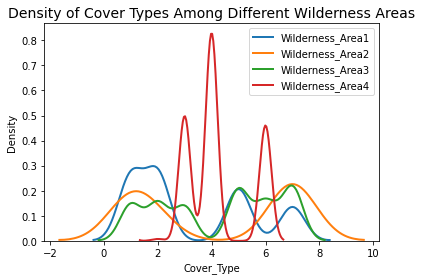

In [15]:
train_df['Wilderness_Area_Type'] = (train_df.iloc[:, 11:15] == 1).idxmax(1)
wilderness_areas = sorted(train_df['Wilderness_Area_Type'].value_counts().index.tolist())

for area in wilderness_areas:
    subset = train_df[train_df['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset['Cover_Type'], label = area, linewidth = 2)
    
plt.ylabel('Density')
plt.xlabel('Cover_Type')
plt.title('Density of Cover Types Among Different Wilderness Areas', size = 14)

In [16]:
size = 10 

#Dataframe with only 'size' features
data = train_df.iloc[:,:size] 


cols=data.columns 
data_corr = data.corr()
threshold = 0.5
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index
           
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


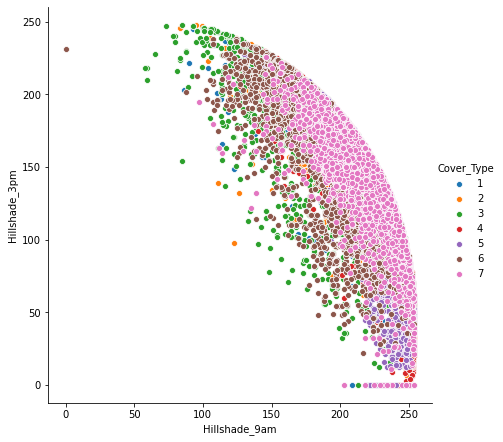

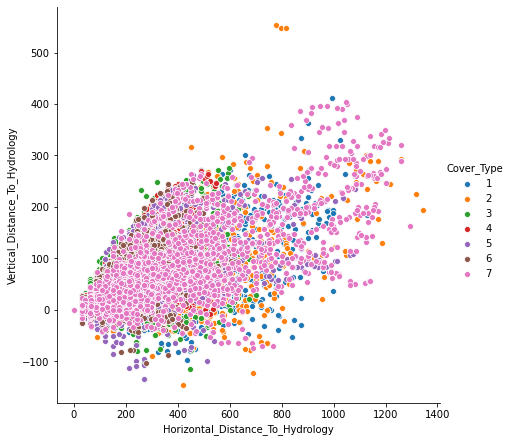

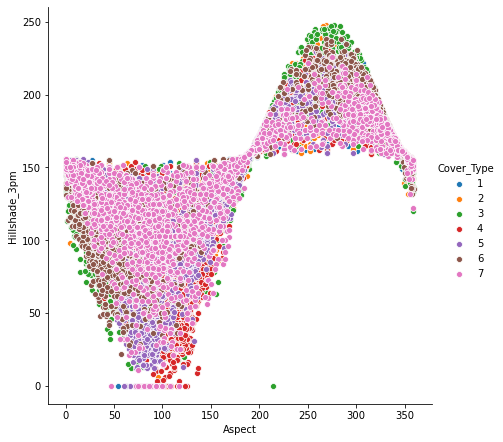

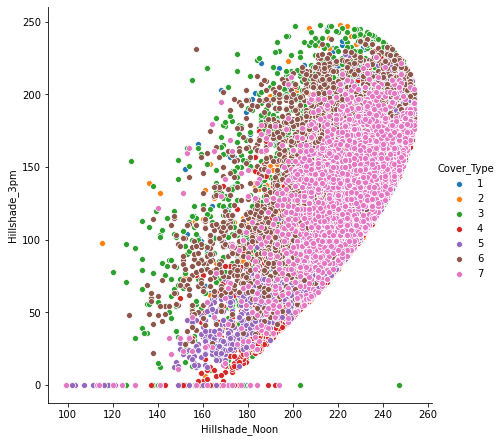

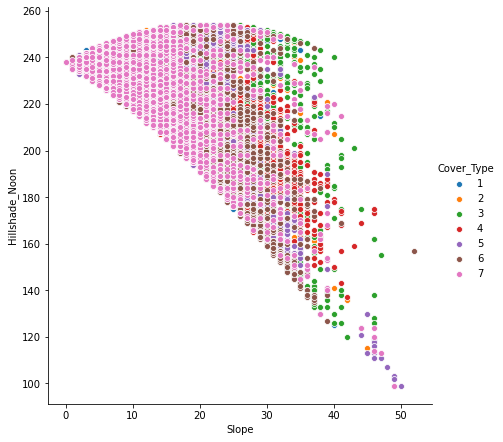

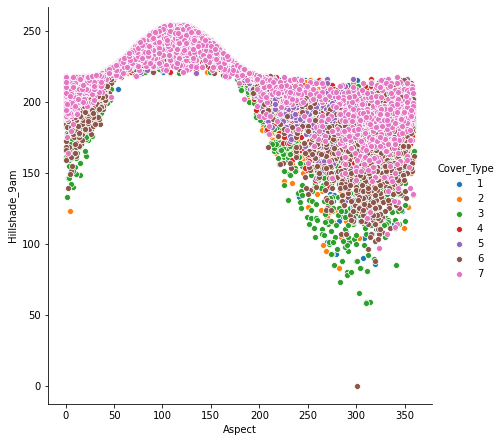

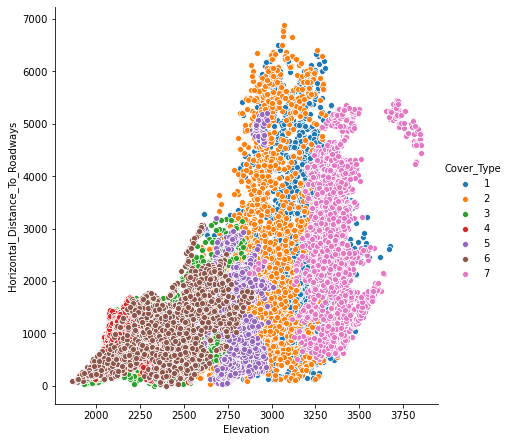

In [17]:
for v,i,j in s_corr_list:
    sns.pairplot(train_df, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

In [32]:
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
train_df_w_numeric_soil = train_df[all_features_w_label]

Text(0.5, 1.05, 'Pearson Correlation of All Features')

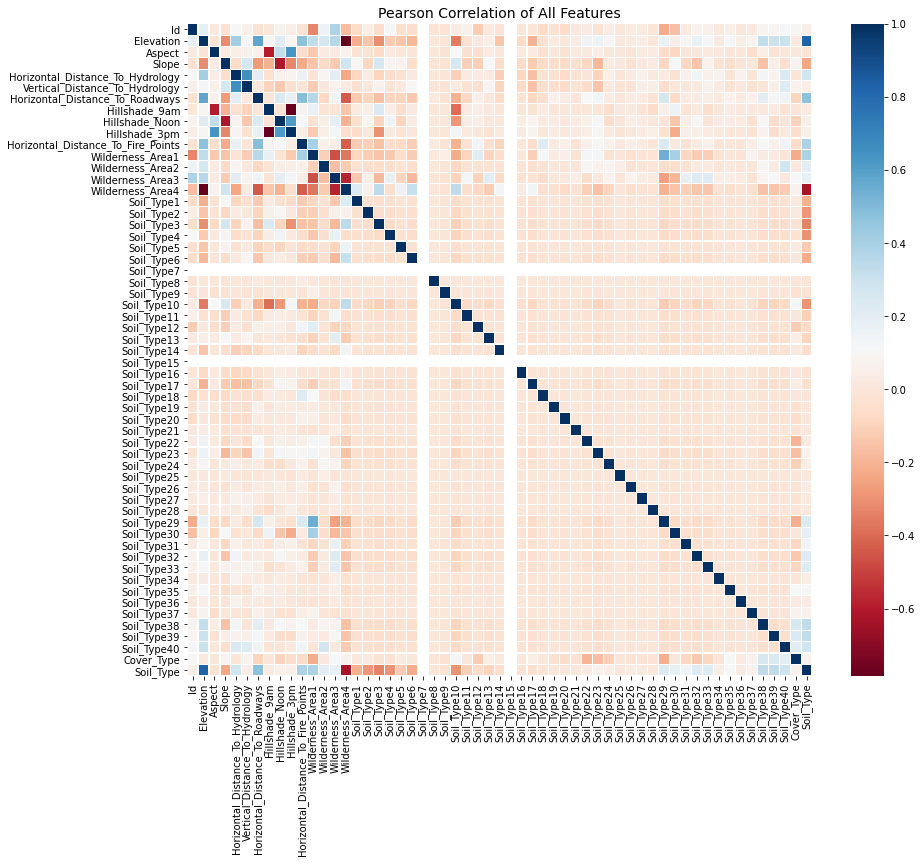

In [33]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

### Seperating Labels from featrues in the training set

In [34]:
# add columns
train_df_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (train_df_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + 
                                                           train_df_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
train_df_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (train_df_w_numeric_soil['Elevation'] + 
                                                                      train_df_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
train_df_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (train_df_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                              train_df_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
train_df_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (train_df_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                            train_df_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
train_df_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (train_df_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] + 
                                                             train_df_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2

In [35]:
# add sqrt transformed columns to the trees_w_numeric_soil dataframe
for col in train_df_w_numeric_soil.columns:
    if train_df_w_numeric_soil[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            train_df_w_numeric_soil['sqrt' + col] = np.sqrt(train_df_w_numeric_soil[col])

In [36]:
correlations_transformed = pd.DataFrame(train_df_w_numeric_soil.corr())
correlations_transformed = pd.DataFrame(correlations_transformed["Cover_Type"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)

,Feature,Correlation with Cover_Type
30,sqrtWilderness_Area1,-0.220713
10,Wilderness_Area1,-0.220713
7,Hillshade_Noon,-0.095848
27,sqrtHillshade_Noon,-0.095399
5,Horizontal_Distance_To_Roadways,-0.094212
20,Mean_Distance_Firepoints_Roadways,-0.092875
19,Mean_Distance_Hydrology_Roadways,-0.091495
39,sqrtMean_Distance_Firepoints_Roadways,-0.089852
38,sqrtMean_Distance_Hydrology_Roadways,-0.080075
25,sqrtHorizontal_Distance_To_Roadways,-0.076923


In [37]:
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]

all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_areas +
                 ['Soil_Type'] + transformed_features)

In [38]:
def split_numbers_chars(row):
    
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

In [39]:
def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [40]:
reverse_one_hot_encode(train_df, 16, 56, "Soil_Type")

In [41]:
train_df['Wilderness_Area_Type'] = (train_df.iloc[:, 11:15] == 1).idxmax(1)

wilderness_areas = sorted(train_df['Wilderness_Area_Type'].value_counts().index.tolist())


continuous_variables = train_df.columns[1:11].tolist()

all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
train_df_w_numeric_soil = train_df[all_features_w_label]

In [42]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Cover_Type', index_label="Id", init_index=15121):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(init_index, 
                                                  predicted_labels.shape[0] + init_index),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(
    train_df.drop('Cover_Type', axis=1), train_df['Cover_Type'],
    test_size=0.2, random_state=17)

In [64]:
first_forest = RandomForestClassifier(
    n_estimators=100, random_state=17, n_jobs=4)

In [65]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14988 entries, 11 to 15119
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  14988 non-null  int64
 1   Elevation                           14988 non-null  int64
 2   Aspect                              14988 non-null  int64
 3   Slope                               14988 non-null  int64
 4   Horizontal_Distance_To_Hydrology    14988 non-null  int64
 5   Vertical_Distance_To_Hydrology      14988 non-null  int64
 6   Horizontal_Distance_To_Roadways     14988 non-null  int64
 7   Hillshade_9am                       14988 non-null  int64
 8   Hillshade_Noon                      14988 non-null  int64
 9   Hillshade_3pm                       14988 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  14988 non-null  int64
 11  Wilderness_Area1                    14988 non-null  int64
 12  Wil

None

In [66]:
first_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=17)

In [67]:
forest_val_pred = first_forest.predict(X_valid)

In [68]:
accuracy_score(y_valid, forest_val_pred)

0.8695797198132088

In [69]:
lgb_clf = LGBMClassifier(random_state=17)

In [70]:
%%time
lgb_clf.fit(X_train, y_train)

Wall time: 2.58 s


LGBMClassifier(random_state=17)

In [71]:
accuracy_score(y_valid, lgb_clf.predict(X_valid))

0.8692461641094062

In [72]:
param_grid = {'num_leaves': [7, 15, 31, 63], 
              'max_depth': [3, 4, 5, 6, -1]}

In [73]:
grid_searcher = GridSearchCV(estimator=first_forest, param_grid=param_grid, 
                             cv=5, verbose=1, n_jobs=4)

In [191]:
pd.DataFrame(first_forest.feature_importances_,
             index=X_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
Elevation,0.185577
Soil_Type,0.094307
Horizontal_Distance_To_Roadways,0.075990
Id,0.074975
Horizontal_Distance_To_Fire_Points,0.058255
Horizontal_Distance_To_Hydrology,0.055963
Vertical_Distance_To_Hydrology,0.047569
Hillshade_9am,0.045700
Wilderness_Area4,0.043380
Aspect,0.043333


In [78]:
param_grid2 = {'learning_rate': np.logspace(-3, 0, 10)}
grid_searcher2 = GridSearchCV(estimator=lgb_clf, param_grid=param_grid2,
                               cv=5, verbose=1, n_jobs=4)
grid_searcher2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   41.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   45.6s finished


GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=17), n_jobs=4,
             param_grid={'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])},
             verbose=1)

In [79]:
print(grid_searcher2.best_params_, grid_searcher2.best_score_)
print(accuracy_score(y_valid, grid_searcher2.predict(X_valid)))

{'learning_rate': 0.46415888336127775} 0.8779816513761467
0.8835890593729153


In [80]:
final_lgb = LGBMClassifier(n_estimators=200, num_leaves=63,
                           learning_rate=0.2, max_depth=-1,
                         n_jobs=4)

In [133]:
%%time
final_lgb.fit(train_df.drop(['Cover_Type','Soil_Type'], axis=1), train_df['Cover_Type'])

Wall time: 2.8 s


LGBMClassifier(learning_rate=0.2, n_estimators=200, n_jobs=4, num_leaves=63)

In [128]:
new_train_df = train_df.drop(['Cover_Type','Soil_Type'], axis=1)
new_train_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
11,12,2886,151,11,371,26,5253,234,240,136,...,0,0,0,0,0,0,0,0,0,0
14,15,2503,157,4,67,4,674,224,240,151,...,0,0,0,0,0,0,0,0,0,0
15,16,2495,51,7,42,2,752,224,225,137,...,0,0,0,0,0,0,0,0,0,0
17,18,2517,72,7,85,6,595,228,227,133,...,0,0,0,0,0,0,0,0,0,0
18,19,2504,0,4,95,5,691,214,232,156,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,0
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,0
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,0
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,0


In [129]:
test_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,581008,2396,153,20,85,17,108,240,237,118,...,0,0,0,0,0,0,0,0,0,0
565888,581009,2391,152,19,67,12,95,240,237,119,...,0,0,0,0,0,0,0,0,0,0
565889,581010,2386,159,17,60,7,90,236,241,130,...,0,0,0,0,0,0,0,0,0,0
565890,581011,2384,170,15,60,5,90,230,245,143,...,0,0,0,0,0,0,0,0,0,0


In [124]:
test_df = pd.read_csv('C:\\Users\\Soham\\Dropbox\\My PC (LAPTOP-AGG4JAFB)\\Desktop\\2nd Sem\\ML code\\test.csv')

In [131]:
list(test_df.columns)

['Id',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [134]:
lgb_final_pred = final_lgb.predict(test_df)

In [135]:
def write_to_submission_file(predicted_labels, out_file,
                             target='Cover_Type', index_label="Id", init_index=15121):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(init_index, 
                                                  predicted_labels.shape[0] + init_index),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [136]:
write_to_submission_file(lgb_final_pred, 
                         'forest_cover_type.csv')

Prediction score came up to 0.72944 on Kaggle

#### References

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://www.kaggle.com/code/keithmatthews/forest-cover-prediction

https://www.kaggle.com/code/gauravduttakiit/forest-cover-type-accuracy-submission/notebook

https://stackoverflow.com

https://www.geeksforgeeks.org